# Credit Card Customer Churn - EDA & Modelling

<a id="introduction"></a>
# Introduction

<a id="Goals"></a>
## Goals & Objective 
Explore and visualize the dataset. Build a classification model to predict if the
customer is going to churn or not, Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

The first goal of this project is to provide an analysis which shows the **difference** between a **non-churning and churning customer**. This will provide us insight into which customers are eager to churn.

The top priority of this case is to identify if a customer will churn or won't. It's important that we don't **predict** churning as non-churning customers. That's why the model needs to be evaluated on the **"Recall"**- metric (goal > 62%).

<a id="Libraries"></a>
## Libraries
Libraries used can be found in the code block below

In [1]:
!pip install imbalanced-learn

In [2]:
# Libraries
import os

# Used for EDA, Customer profiling
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation

# to handle imblacing
from imblearn.over_sampling import SMOTE

# Convert catergorical column to numaric
from sklearn.preprocessing import LabelEncoder
# classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

# statistics
from scipy import stats
from scipy.stats import randint
from scipy.stats import uniform

# for evalution
from sklearn.metrics import mean_absolute_error


# Presets
%matplotlib inline
sns.set()

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

<a id=TheData></a>
# The Data
<a id="DataSample"></a>
## Data sample

The building block of any data science project is the data. Below you can find one data record which will be used in further analysis. The dataset consist of 10000 samples describing the customers and it's behavior.

The following columns/features can be split up in the following groups:

* ***Basic information***:
    * **CLIENTNUM** : Unique identifier for the customer holding the account.


* ***Target/Label***:
    * **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0.


* ***Demographic variables***:
    * **Customer_Age**: Demographic variable - Customer's Age in Years.
    * **Gender**: Demographic variable - M=Male, F=Female.
    * **Dependent_count**: Demographic variable - Number of dependents.
    * **Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).
    * **Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown.
    * **Income_Category**: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >).
    

* ***Product variables***:
    * **Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
    * **Months_on_book**: Period of relationship with bank.
    * **Total_Relationship_Count**: Total no. of products held by the customer.
    * **Months_Inactive_12_mon**: No. of Months in the last 12 months.
    * **Contacts_Count_12_mon**: No. of Contacts in the last 12 months.
    * **Credit_Limit**: Credit Limit on the Credit Card.
    * **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card.
    * **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months
    * **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1).
    * **Total_Trans_Amt**: Total Transaction Amount (Last 12 months).
    * **Total_Trans_Ct**: Total Transaction Count (Last 12 months).
    * **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1).
    * **Avg_Utilization_Ratio**: Average Card Utilization Ratio.


* ***Unimportant variables***:
    * **Naive_Bayes**: It was mentioned that all columns containing the "N.B."-tag should be disregarded.


In [3]:
data = pd.read_csv('BankChurners.csv')
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

# SECTION 1

<a id="DataPreprocessing" ></a>
## Data Preprocessing EDA(Exploratry Data Analysis)
In this phase we'll quickly explore the data and remove/impute incorrect values. So that a cleaned data can be used for further analysis/modelling.

* Remove unnecessary columns.
* Check for duplicates.
* Change ID to client number.
* Check for null values.



In [4]:
for column in data.columns:
    print("Column name: " + column)

print("Column count: " + str(len(data.columns)))

Column name: CLIENTNUM
Column name: Attrition_Flag
Column name: Customer_Age
Column name: Gender
Column name: Dependent_count
Column name: Education_Level
Column name: Marital_Status
Column name: Income_Category
Column name: Card_Category
Column name: Months_on_book
Column name: Total_Relationship_Count
Column name: Months_Inactive_12_mon
Column name: Contacts_Count_12_mon
Column name: Credit_Limit
Column name: Total_Revolving_Bal
Column name: Avg_Open_To_Buy
Column name: Total_Amt_Chng_Q4_Q1
Column name: Total_Trans_Amt
Column name: Total_Trans_Ct
Column name: Total_Ct_Chng_Q4_Q1
Column name: Avg_Utilization_Ratio
Column count: 21


### Check for duplicates and change ID to ClientNumber

In [5]:
# True if duplicates are present
data.duplicated().any()

False

In [6]:
# Change the ID to the ClientNumber
data = data.set_index("CLIENTNUM")

### Null values?

In [7]:
# Describe columns
data.isnull().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [8]:
# lets try to check the missing values of each column in a dataset 
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

2 columns have null values are found.

In [9]:
#list for catagorical columns
cat_cols = []
#list for numerical columns
num_cols = []
#list for binary columns
binary_cols = []

for i in data.columns:
    if data[i].dtypes =='object':
        cat_cols.append(i)        
    else:
        if data[i].nunique() == 2:
            binary_cols.append(i)
        else:
            num_cols.append(i) 

In [10]:
print(cat_cols)
print("Length of catagorical columns : ",len(cat_cols))

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Length of catagorical columns :  6


In [11]:
print(num_cols)
print("Length of numerical columns : ",len(num_cols))

['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Length of numerical columns :  14


In [12]:
print(binary_cols)
print("Length of binary columns : ",len(binary_cols))

[]
Length of binary columns :  0


In [13]:
# lets try to check the shape of data
data.shape

(10127, 20)

In [14]:
# lets try to check the general information of all columns in dataset`
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

There are no missing values 

In [15]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Descriptive Anaylsis

In [16]:
# The Exploratory Data Anaylsis describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
# number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 
data.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [17]:
data.describe(include=['object']).T  

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

### Observations: 
 -  Most of the Customers surveyed are current customers and have an open account.
 -  Most of the customers completed graduate school. 
 -  Most of the customers are Married. 
 -  Most of the customers make less than $40K a year. - This seems weird since they have graduate degrees. 
 -  Most customers are blue card members.



In [18]:
# In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest
# in the include parameter.
data.describe(include=['bool','object'])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127            8608           9378   
unique                  2      2               6              3   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

# Data Visualization (EDA)

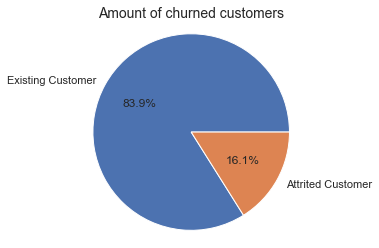

In [19]:
## Check the target variable
### Amount of churned customers
# How many customers have churned?

target = data["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

 - It's clear that the majority of our customers (83.9 %) stays. 
 - Since "attrited" or "churned" label is less then 20% of the total all customers. 
 - We can say that we have an imbalanced data. 
 - Upsampling will be required to receive a better results.

In [20]:
# Some functions

churned = data[data['Attrition_Flag'] == "Attrited Customer"]
nonchurned = data[data['Attrition_Flag'] == "Existing Customer"]

def plot_pie(column):
    target = data[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()
    

def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)    
    width = 1       # the width of the bars: can also be len(x) sequence
    
    figs, axs = plt.subplots(1,2, figsize=(12,5))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)
    
    
    plt.show()

## Checking the demographic variables
### Age compared to the churn

# Univariate Analysis And Bivariate Analysis

# Univariate Analysis
 - Numerical variables 
 - Central tendency
 - Dispersion.


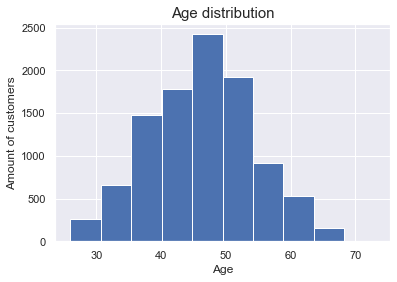

In [21]:
# Checking the overal distribution
data["Customer_Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

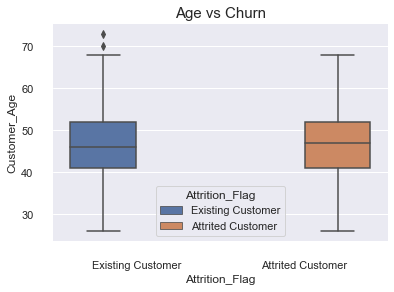

In [22]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Customer_Age",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Age vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

 - The age is normally distributed. 
 - There is no clear difference between the age distribution.

### Gender vs churn
 - Are males of females more eager to churn?

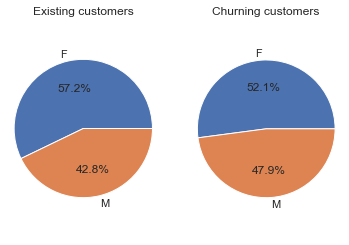

In [23]:
# Gender vs churn
churnedtarget = churned["Gender"].value_counts()
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2)

axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

 -  The difference is too small to say that one gender is more eager to churn.

### Number of dependents vs churn

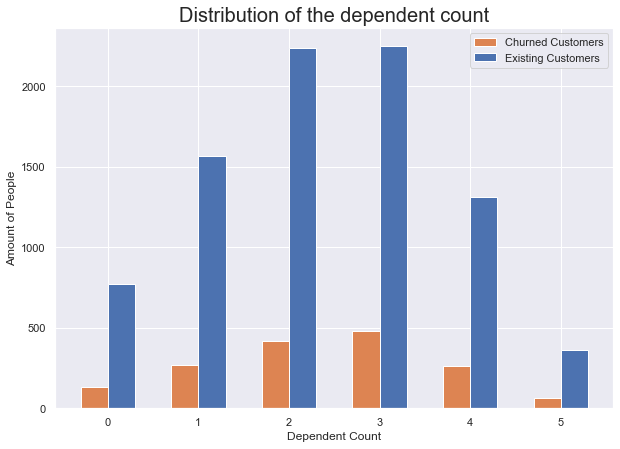

In [24]:
# Number of dependents vs churn
N = 6
ChurnedCounts = churned["Dependent_count"].value_counts().sort_index()
NonChurnedCounts = nonchurned["Dependent_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(10,7))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the dependent count', fontsize=20)
# axs.set_xticks(ind, ('0', '1', '2', '3', '4', '5'))
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

In [25]:
churned['Dependent_count'].describe()

count    1627.000000
mean        2.402581
std         1.275010
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Dependent_count, dtype: float64

In [26]:
nonchurned['Dependent_count'].describe()

count    8500.000000
mean        2.335412
std         1.303229
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Dependent_count, dtype: float64

 - The dependent count shows us a normal distribution. 
 - No clear shift is visible when comparing the churned and non churned distribution.

### Education level vs churn

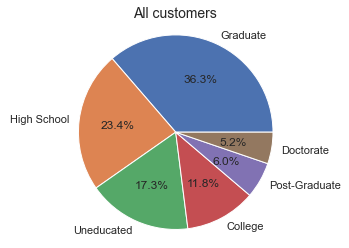

In [27]:
# Education level vs churn¶
plot_pie("Education_Level")

 - Majority of people have Graduate Education level followed by High School. 
 - 15% of the population has an Unknown Education level.

### Income category vs churn

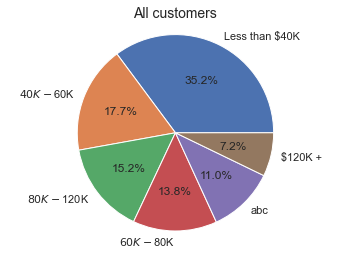

In [28]:
plot_pie("Income_Category")

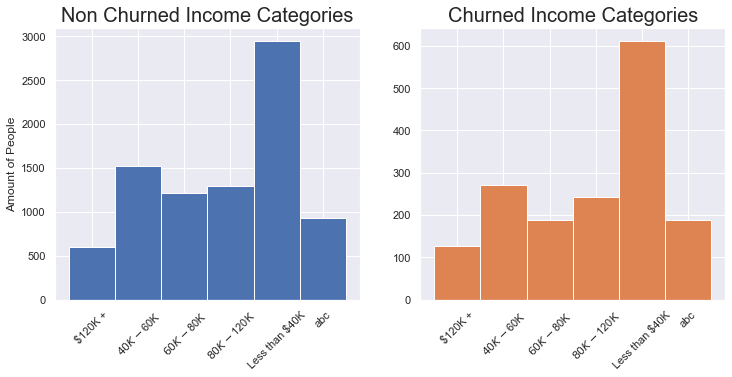

In [29]:
plot_compare("Income_Category", "Income Categories")

 - Large number of customers earn less then $40k a year.
 - Like the other demographic variables no clear shift in the distributions can be noticed.

## Checking the product variables
### Types of cards vs churn

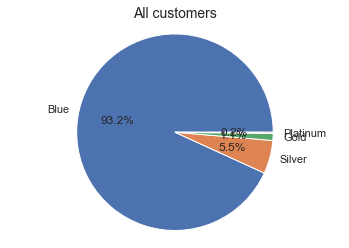

In [30]:
# Types of cards vs churn
plot_pie("Card_Category")

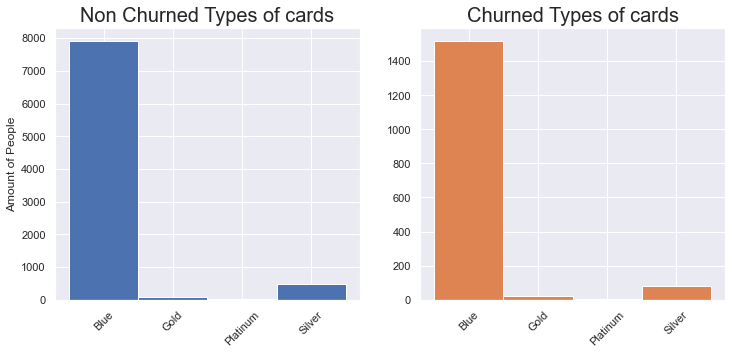

In [31]:
# comparing plot
plot_compare("Card_Category", "Types of cards")

 - Most customers have the "Blue" card. 
 - The distribution of churned/not churned is the same.

<AxesSubplot:xlabel='Credit_Limit'>

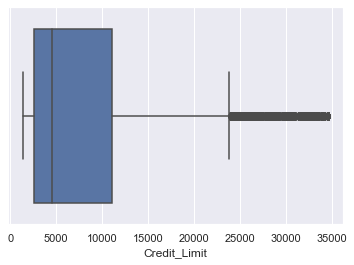

In [32]:
sns.boxplot(data['Credit_Limit'])


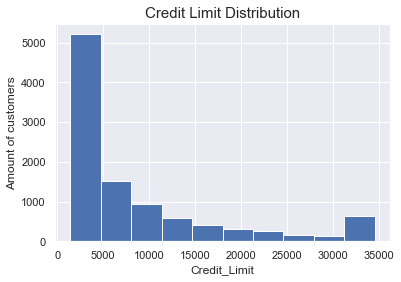

In [33]:
# Checking the overal distribution
data["Credit_Limit"].hist()
plt.xlabel("Credit_Limit")
plt.ylabel("Amount of customers")
plt.title("Credit Limit Distribution", fontsize=15)
plt.show()

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Density'>

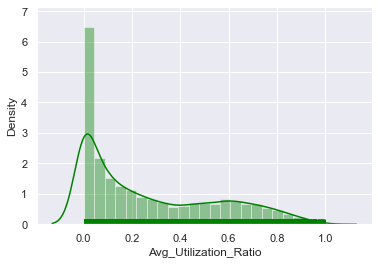

In [34]:
sns.distplot(data['Avg_Utilization_Ratio'], kde=True, rug=True, color='green')


<AxesSubplot:xlabel='Dependent_count', ylabel='Density'>

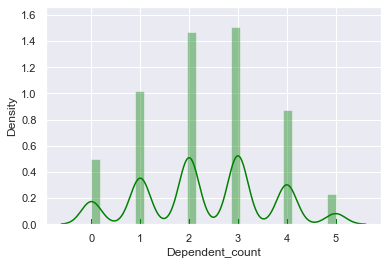

In [35]:
sns.distplot(data['Dependent_count'], kde=True, rug=True,color='green')

 - From it shows Most of Customers have 2 to 3 dependents 

 - Utilization is right skewed, with a large amount of customers hardly using thier
credit, if at all. 

In [36]:
df1 = data.copy()

In [37]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(z):
    total = len(df1[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df1[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot


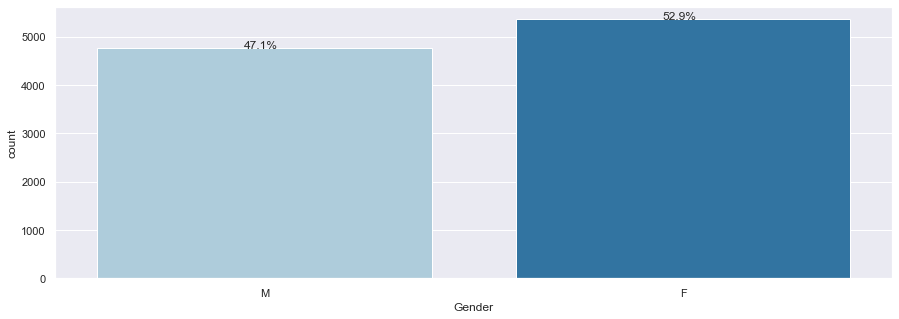

In [38]:
# Lets look at Gender
perc_on_bar('Gender')


 - We can see there are more Females than male, but very close

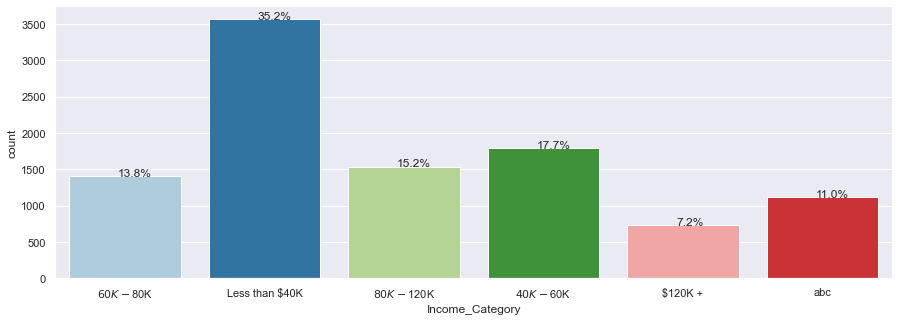

In [39]:
# Lets look at Income Category
perc_on_bar('Income_Category')

 - Above shows that most customers make less than $40K a year, with second going to 40-60K

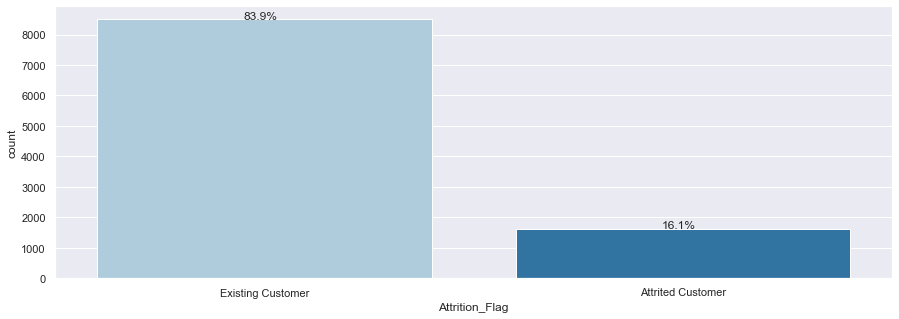

In [40]:
# Attrition Flag 
perc_on_bar('Attrition_Flag')

 - Above shows there are 84% existing customers

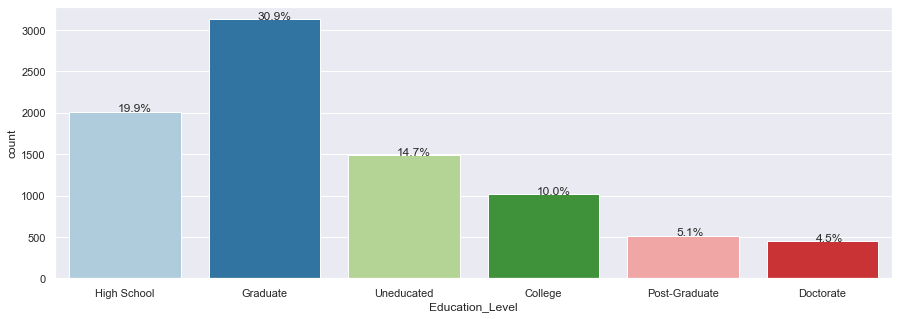

In [41]:
# Education Level
perc_on_bar('Education_Level')


- From the above we see 
  -  31% of customers hold graduate degrees, second high school only.  

# Bivarirate Analysis

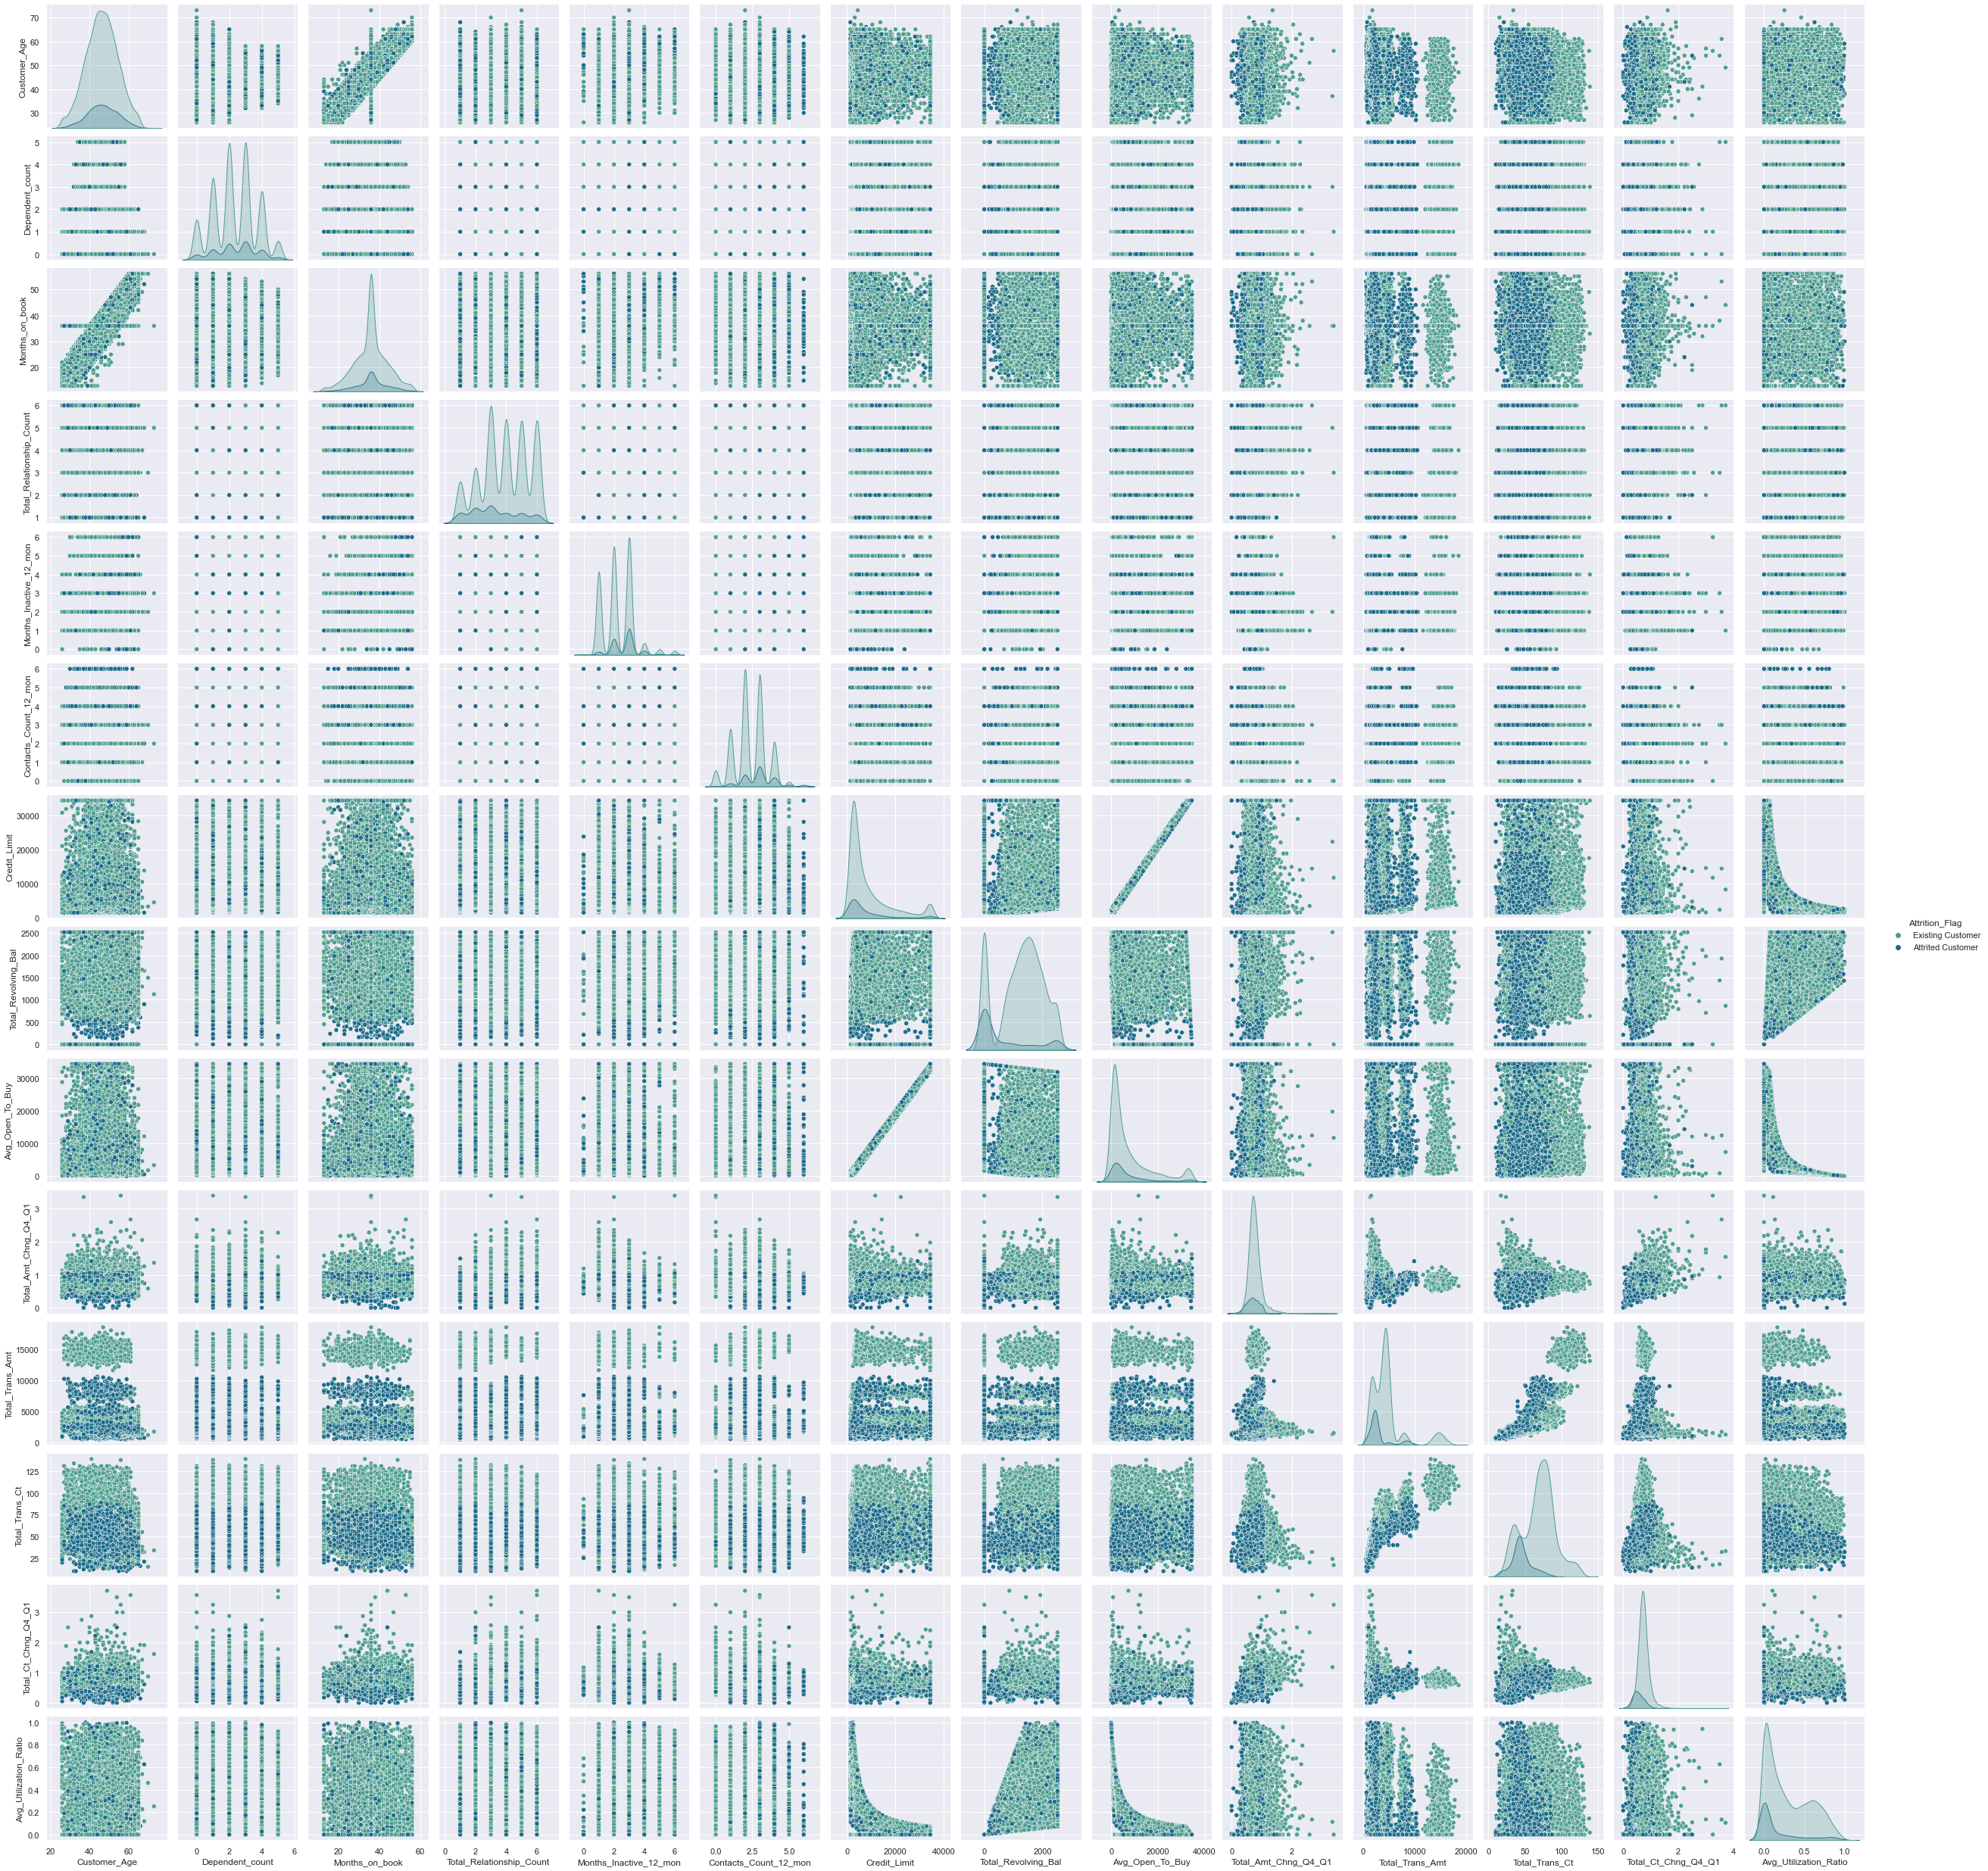

In [42]:
sns.pairplot(data,hue='Attrition_Flag',palette='crest')


### Relationship with bank vs churn

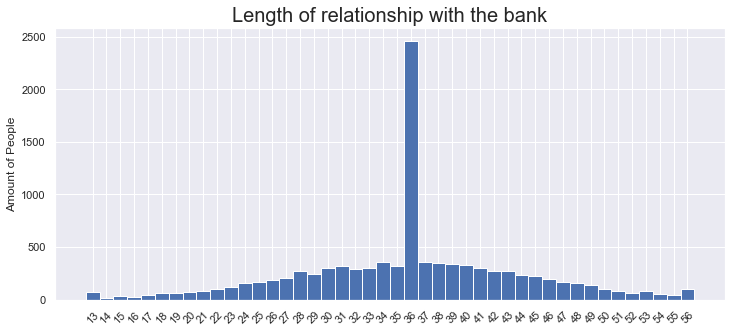

In [43]:
# 'Length of relationship with the bank
column = "Months_on_book"

N = len(data[column].unique())
DataCounts = data[column].value_counts().sort_index()

ind = np.arange(N) 
width = 1       

figs, axs = plt.subplots(figsize=(12,5))

axs.bar(ind, DataCounts, width, color='b')
axs.set_ylabel('Amount of People')
axs.set_title('Length of relationship with the bank', fontsize=20)
axs.set_xticks(ind)
axs.set_xticklabels(DataCounts.index.tolist(), rotation=45)

plt.show()

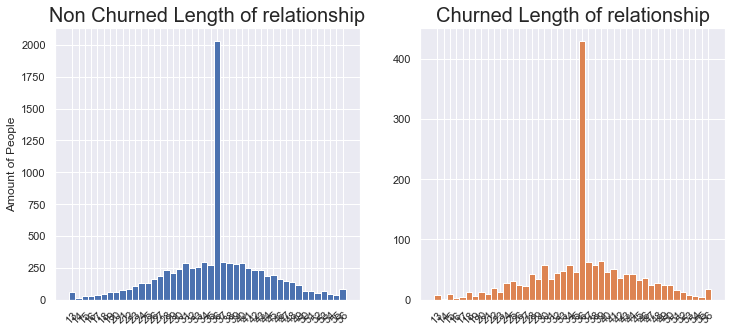

In [44]:
plot_compare("Months_on_book", "Length of relationship")

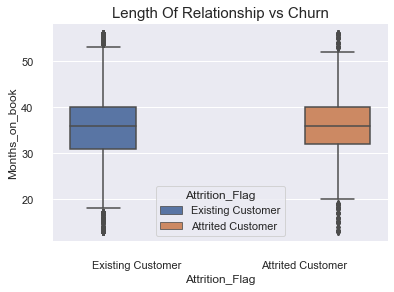

In [45]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Months_on_book",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Length Of Relationship vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

### Number of products bought vs churn

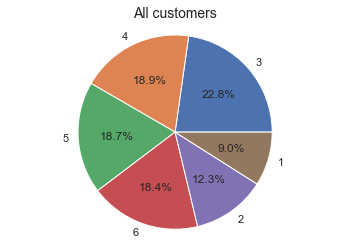

In [46]:
# Number of products bought vs churn
plot_pie("Total_Relationship_Count")

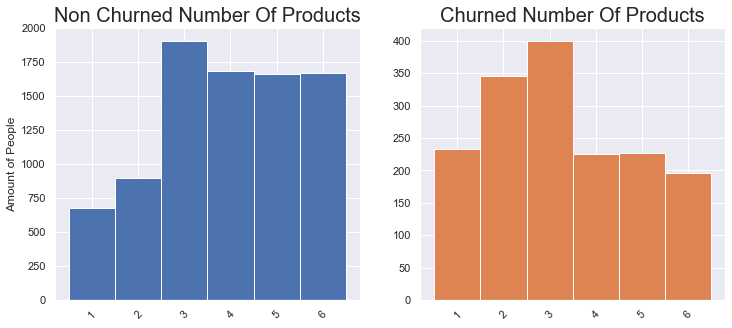

In [47]:
plot_compare("Total_Relationship_Count", "Number Of Products")

 - Here we see a shift in the distribution when we compare the churned vs the nonchurned. 
 - It's clear that the non churned customers tend to buy more products then the churned customers.

### Months inactive vs churn

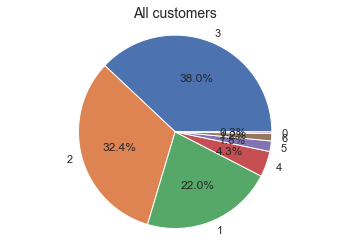

In [48]:
plot_pie("Months_Inactive_12_mon")

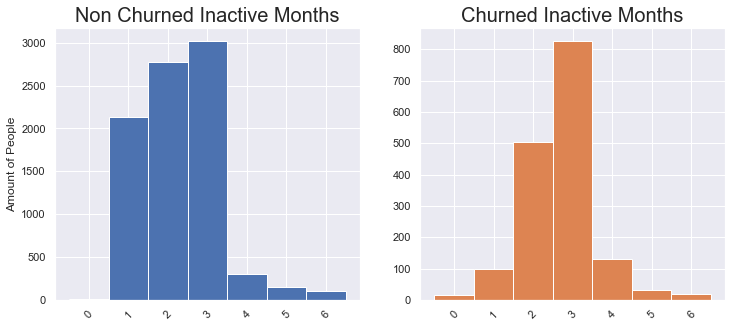

In [49]:
plot_compare("Months_Inactive_12_mon", "Inactive Months")

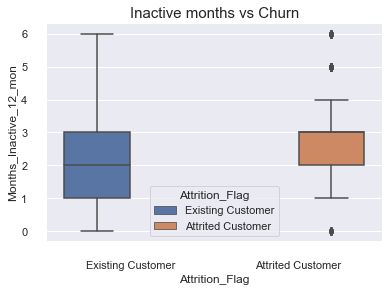

In [50]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Inactive months vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

 - It's clear that the most of the customers show a 3 month inactivity. 
 - It can be said that most of the active members (less then 3 months) can be found within the non churning customers.

### Number of contacts vs churn

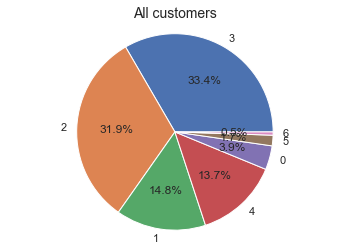

In [51]:
plot_pie("Contacts_Count_12_mon")

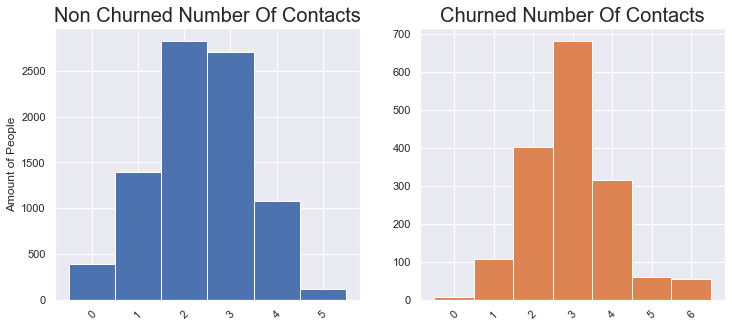

In [52]:
plot_compare("Contacts_Count_12_mon", "Number Of Contacts")

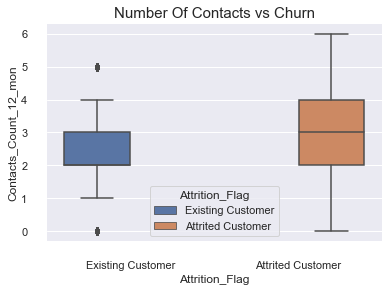

In [53]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Number Of Contacts vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

 - Churned customers are most likely to have more contact then the non churned customers.
 - Although the difference isn't large it's still noticable. 

### Credit limit vs churn

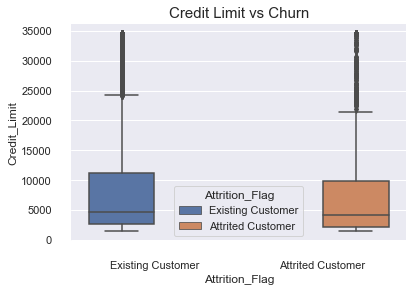

In [54]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Credit_Limit",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Credit Limit vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

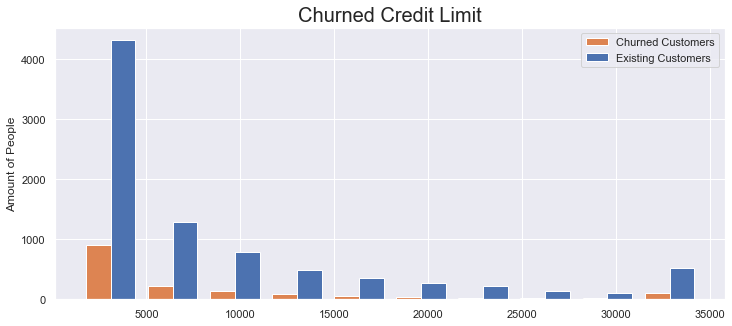

In [55]:
column = "Credit_Limit"
category_name = "Credit Limit" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8452','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

 - There is no clear difference in the credit limit.

### Total revolving balance vs churn

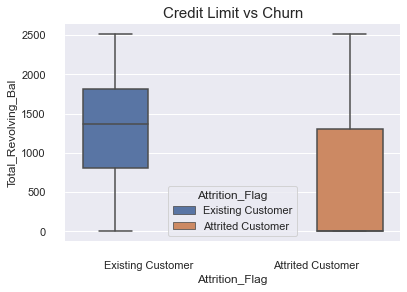

In [56]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Credit Limit vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

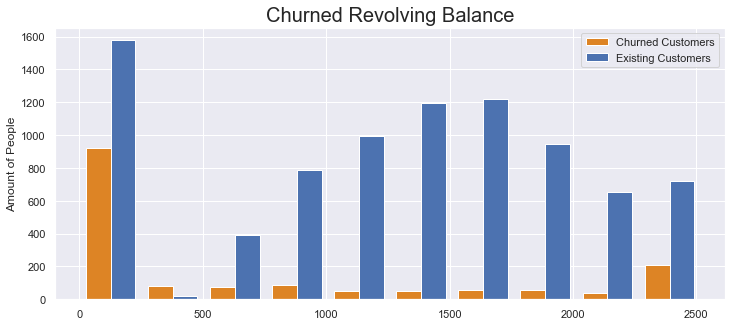

In [57]:
column = "Total_Revolving_Bal"
category_name = "Revolving Balance" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

 - It's clear that the churned customers have a lower revolving balance then the existing customers.

### Openness To Buy Credit Line vs churn

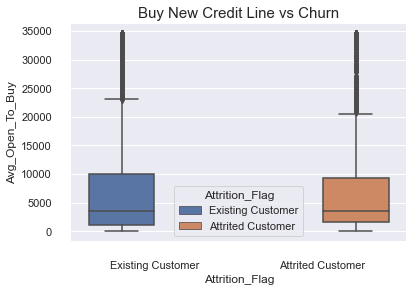

In [58]:
# Comparing the age distribution vs the target
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Buy New Credit Line vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

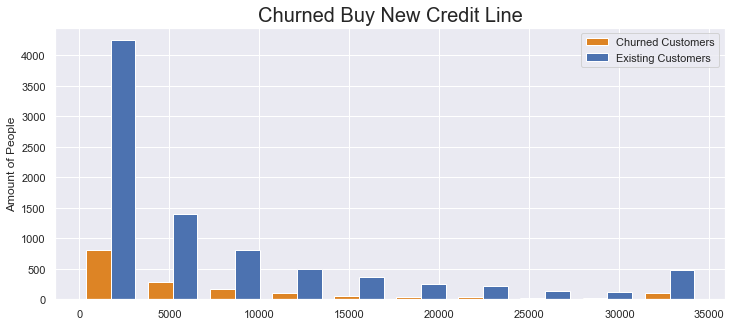

In [59]:
column = "Avg_Open_To_Buy"
category_name = "Buy New Credit Line" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425', 'b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

 - No distinctive difference.


### Change in Transaction vs Churn

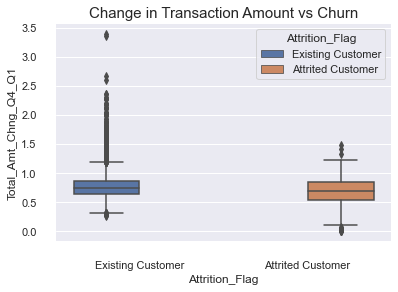

In [60]:
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Change in Transaction Amount vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

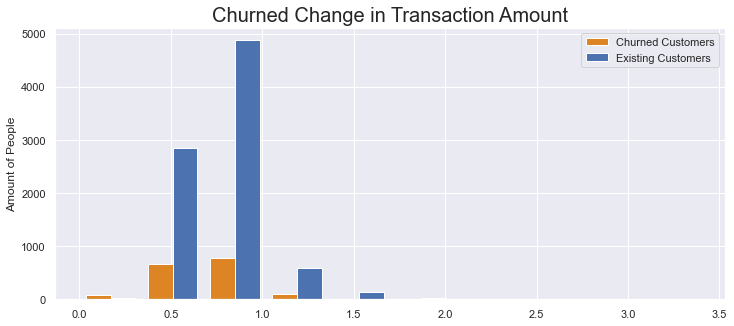

In [61]:
column = "Total_Amt_Chng_Q4_Q1"
category_name = "Change in Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

 - No clear difference.

### Total transaction amount vs churn

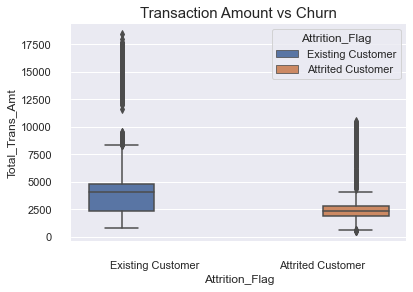

In [62]:
# Let's check the relationship of two variables concerning each other
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Transaction Amount vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

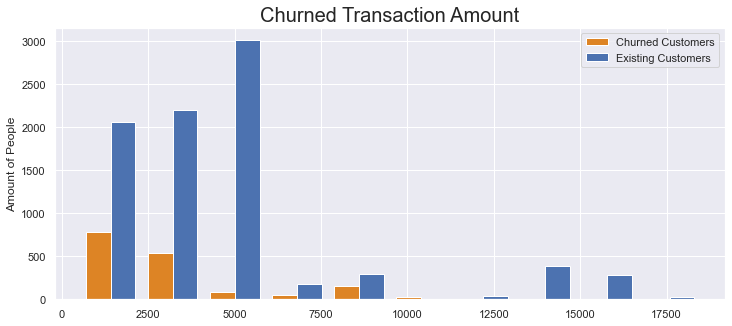

In [63]:
# It's clear that the transaction amount is lower for the churned customers compared to the existing customers.
column = "Total_Trans_Amt"
category_name = "Transaction Amount" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

 - It's clear that the transaction amount is lower for the churned customers compared to the existing customers.

### Total transaction count vs Churn 

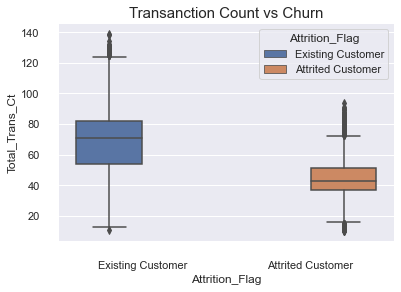

In [64]:
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Transanction Count vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

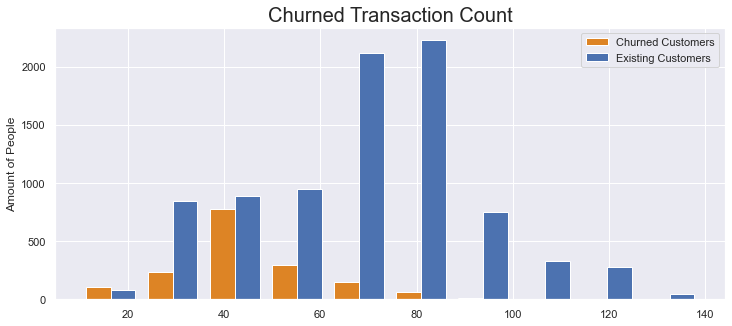

In [65]:
# Let's check the relationship of two variables concerning each other
# It's clear that churned customers mostly have a lower transaction count then the existing customers.
column = "Total_Trans_Ct"
category_name = "Transaction Count" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=[ '#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))


plt.show()

 - It's clear that churned customers mostly have a lower transaction count then the existing customers.

### Change in transaction count vs Churn

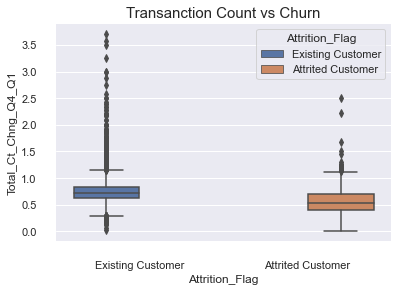

In [66]:
# Change in transaction count vs Churn check the realation between those
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Transanction Count vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

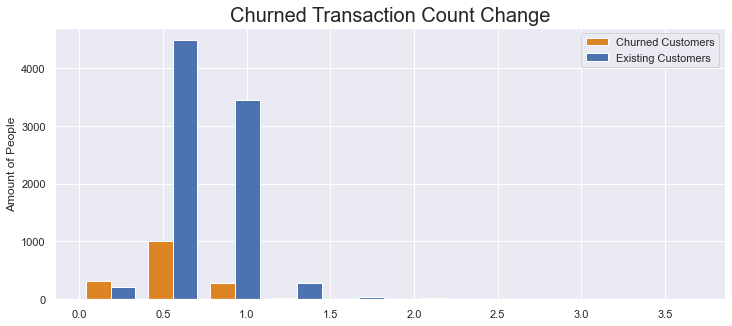

In [67]:
# Again there's a clear difference between in the distribution. The average is higher for the existing customers
column = "Total_Ct_Chng_Q4_Q1"
category_name = "Transaction Count Change" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

 - Again there's a clear difference between Churned and Existing Customer distribution. 
 - The average is higher for the existing customers.

### Average Card Utilization Ratio

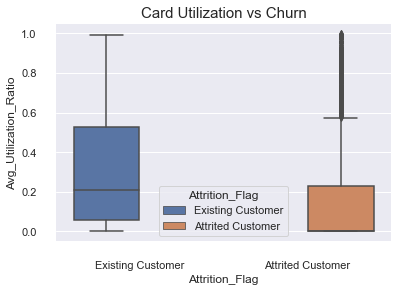

In [68]:
# Average Card Utilization Ratio
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=data).set_title("Card Utilization vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

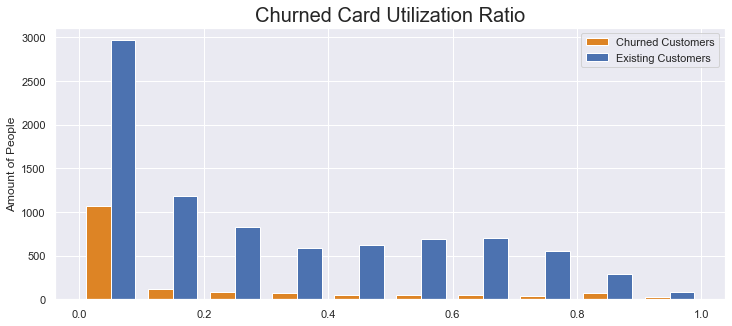

In [69]:
# It's clear that the average card utilization ratio is higher for the existing customers.
column = "Avg_Utilization_Ratio"
category_name = "Card Utilization Ratio" 

NChurned = len(churned[column].unique())
NNonChurned = len(nonchurned[column].unique())

figs, axs = plt.subplots(figsize=(12,5))
    
axs.hist([churned[column], nonchurned[column]] , color=['#DD8425','b'])

axs.set_ylabel('Amount of People')
axs.set_title('Churned ' + category_name, fontsize=20)
axs.legend(('Churned Customers', 'Existing Customers'))

plt.show()

 - It's clear that the average card utilization ratio is higher for the existing customers.

# Correlation

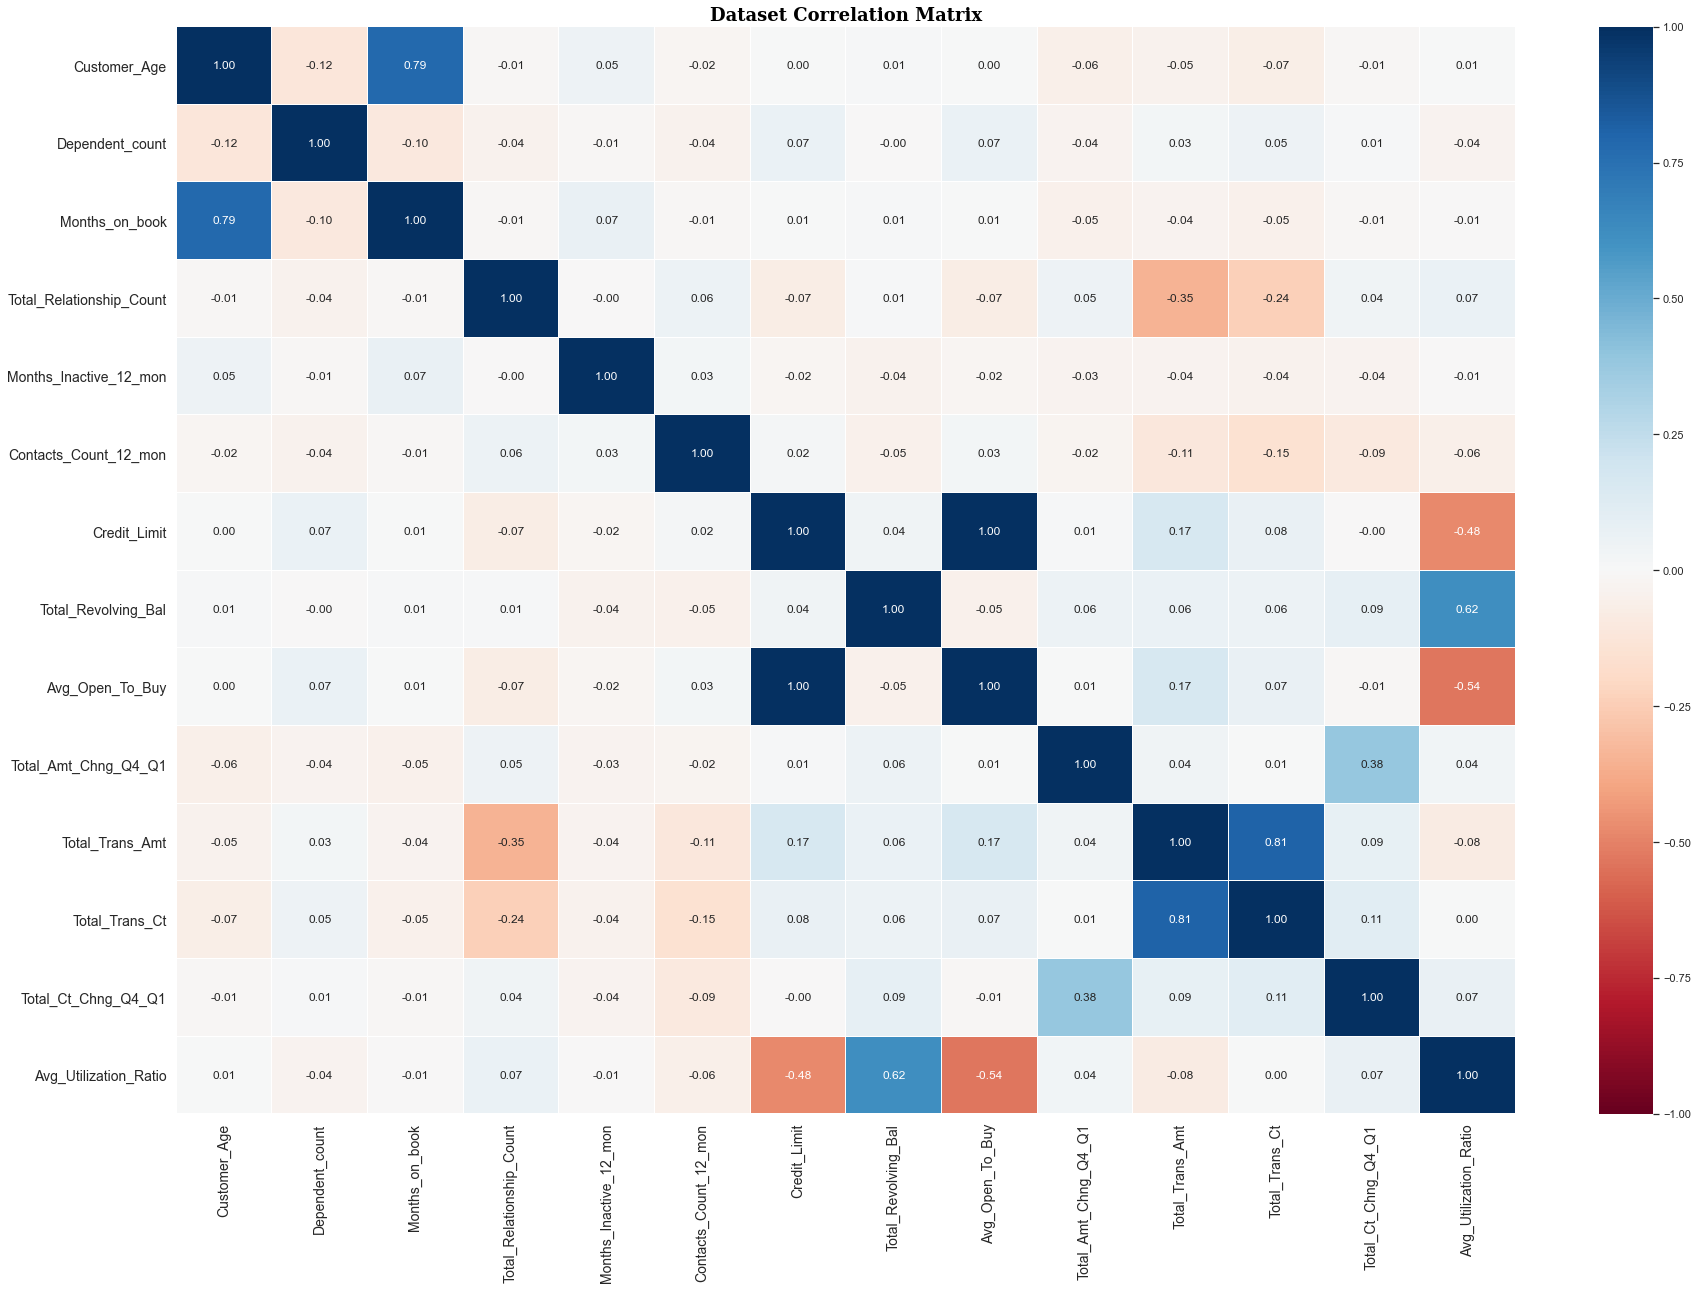

In [70]:
#plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[30,20])
sns.heatmap(data.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap="RdBu", vmin=-1, vmax=1)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict={'family': 'serif', 'color': 'black', 'size': 18, 'weight': 'bold'})
fig.show();

 - There is a 1:1 ratio for Average Open and Credit Limit
 - Months on Books is highly corrolated with Age.
 - Transaction amount and transaction count are also correlated. 

<a id="Profiles"></a> 
## Non Churn and Churn Profiles

 - According to the EDA above, the profiles below can be made. 
 - It's clear that the main difference lays in the "product variables" of the customers. 
 - A churning customers tends to be less active then an existing customer. 
 - It's clear that the most influential parameters are features related to the activity of the customer.


|            |  Non Churning Customer | Churning Customer | 
|:----------:|:-------------:|:--------:|
||||
| ***Demographic variables*** |
| Age | 47 | 46 | 
| Gender | F/M | F/M |
| Dependents | 2 | 2 |
| Education Level | Graduate | Graduate |
| Marital Level | Married/Single | Married/Single |
| Income Category | Less then \$40K | Less  then \$40K |
||||
| ***Product variables*** |
| Type Of Card | Blue | Blue |
| Length Of Relationship | 36 months | 36 months |
| Products Bought | 4 | 3 |
| Inactive Months | 2 | 3 |
| Number Of Contact | 2 | 3 |
| Credit Limit | \$8726 | \$8136 |
| Revolving Balance | 1256 | 672 |
| Open To Buy Credit Line | 7470 | 7463 |
| Transaction Amount Change | 0.77 | 0.69 |
| Total Transaction Amount | 4650 | 3095 |
| Total Transaction Count | 69 | 45 |
| Transaction Count Change | 0.74 | 0.55 |
| Card Utilization Ratio | 0.3 | 0.16 |

In [71]:
churned.describe()

Customer_Age  Dependent_count  Months_on_book  \
count   1627.000000      1627.000000     1627.000000   
mean      46.659496         2.402581       36.178242   
std        7.665652         1.275010        7.796548   
min       26.000000         0.000000       13.000000   
25%       41.000000         2.000000       32.000000   
50%       47.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       68.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               1627.000000             1627.000000   
mean                   3.279656                2.693301   
std                    1.577782                0.899623   
min                    1.000000                0.000000   
25%                    2.000000                2.000000   
50%                    3.000000                3.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            1627.000000   1627.000000          1627.000000   
mean                2.972342   8136.039459           672.822987   
std                 1.090537   9095.334105           921.385582   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2114.000000             0.000000   
50%                 3.000000   4178.000000             0.000000   
75%                 4.000000   9933.500000          1303.500000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      1627.000000           1627.000000      1627.000000     1627.000000   
mean       7463.216472              0.694277      3095.025814       44.933620   
std        9109.208129              0.214924      2308.227629       14.568429   
min           3.000000              0.000000       510.000000       10.000000   
25%        1587.000000              0.544500      1903.500000       37.000000   
50%        3488.000000              0.701000      2329.000000       43.000000   
75%        9257.500000              0.856000      2772.000000       51.000000   
max       34516.000000              1.492000     10583.000000       94.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          1627.000000            1627.000000  
mean              0.554386               0.162475  
std               0.226854               0.264458  
min               0.000000               0.000000  
25%               0.400000               0.000000  
50%               0.531000               0.000000  
75%               0.692000               0.231000  
max               2.500000               0.999000

In [72]:
nonchurned.describe()

Customer_Age  Dependent_count  Months_on_book  \
count   8500.000000      8500.000000     8500.000000   
mean      46.262118         2.335412       35.880588   
std        8.081157         1.303229        8.021810   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               8500.000000             8500.000000   
mean                   3.914588                2.273765   
std                    1.528949                1.016741   
min                    1.000000                0.000000   
25%                    3.000000                1.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            8500.000000   8500.000000          8500.000000   
mean                2.356353   8726.877518          1256.604118   
std                 1.081436   9084.969807           757.745354   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2602.000000           800.000000   
50%                 2.000000   4643.500000          1364.000000   
75%                 3.000000  11252.750000          1807.000000   
max                 5.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      8500.000000           8500.000000      8500.000000     8500.000000   
mean       7470.273400              0.772510      4654.655882       68.672588   
std        9087.671862              0.217783      3512.772635       22.919011   
min          15.000000              0.256000       816.000000       11.000000   
25%        1184.500000              0.643000      2384.750000       54.000000   
50%        3469.500000              0.743000      4100.000000       71.000000   
75%        9978.250000              0.860000      4781.250000       82.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          8500.000000            8500.000000  
mean              0.742434               0.296412  
std               0.228054               0.272568  
min               0.028000               0.000000  
25%               0.617000               0.055000  
50%               0.721000               0.211000  
75%               0.833000               0.529250  
max               3.714000               0.994000

# SECTION 2

 - Data pre-processing
 - Prepare the data for analysis 
 - Feature Engineering 
 - Missing value Treatment 
 - Outlier Treatment 
 Note: Please ensure no data leakage occurs among train-test and validation sets


# Feature Selection

In [73]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values 
# and type against each column.
stats = []
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    ## Exploratory Data Anaylsis
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'percentage high one category values', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  \
4            Education_Level              6                     14.999506   
5             Marital_Status              3                      7.396070   
0             Attrition_Flag              2                      0.000000   
11     Contacts_Count_12_mon              7                      0.000000   
18       Total_Ct_Chng_Q4_Q1            830                      0.000000   
17            Total_Trans_Ct            126                      0.000000   
16           Total_Trans_Amt           5033                      0.000000   
15      Total_Amt_Chng_Q4_Q1           1158                      0.000000   
14           Avg_Open_To_Buy           6813                      0.000000   
13       Total_Revolving_Bal           1974                      0.000000   
12              Credit_Limit           6205                      0.000000   
10    Months_Inactive_12_mon              7                      0.000000   
1               Customer_Age             45                      0.000000   
9   Total_Relationship_Count              6                      0.000000   
8             Months_on_book             44                      0.000000   
7              Card_Category              4                      0.000000   
6            Income_Category              6                      0.000000   
3            Dependent_count              6                      0.000000   
2                     Gender              2                      0.000000   
19     Avg_Utilization_Ratio            964                      0.000000   

    percentage high one category values     type  
4                             30.887726   object  
5                             46.282216   object  
0                             83.934038   object  
11                            33.376123    int64  
18                             1.688555  float64  
17                             2.053915    int64  
16                             0.108621    int64  
15                             0.355485  float64  
14                             3.199368  float64  
13                            24.390244    int64  
12                             5.016293  float64  
10                            37.977683    int64  
1                              4.937296    int64  
9                             22.760936    int64  
8                             24.321122    int64  
7                             93.176656   object  
6                             35.163425   object  
3                             26.977387    int64  
2                             52.908068   object  
19                            24.390244  float64

In [74]:
df2 = data.copy()

In [75]:
# lets try to remove columns with percentage of high one category values and high missing values.
# Removing colums with 90% features with one category only and 90% features with missing values
good_cols = list(df2.columns)
for col in df2.columns:
    
    #remove columns with high NA rate
    na_rate = df2[col].isnull().sum()/ df2.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = df2[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > 0.9 and unbalanced_rate > 0.9:
        good_cols.remove(col)         

In [76]:
# extract a good columns
df2 = df2[good_cols]

In [77]:
df2.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School            NaN  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

# Handling Missing Values

In [78]:
# lets try to handle the missing values of catagorical with Uknown and numeric with avearge (mean)
for i in list(data.columns):
    if data[i].dtype == 'object':
        data[i].fillna('Unknown',inplace=True)
    else:
        data[i].fillna(data[i].mean(),inplace=True)

In [79]:
# lets try to look the clean data
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

In [80]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<a id="CustomerChurnPrediction"></a>
# Customer Churn Prediction
Here we will train an optimized (treebased) model which will predict if a customer will or won't churn. 

<a id="DataPrep"></a>
## Data Preperation
Before we start training a model we must prepare our data. Different steps that we can undertake:
* Encode all categorical data (watch out with one hot encoding and tree-based models...).
* Scale data
* Check correlation matrix to extract the most influential features.
* Generate new columns from data.
* Upsample the imbalanced dataset (SMOTE/ADASYN).

In this notebook we shall focus on the upsampling method. The data wrangling is performed to make sure that the upsampling is performed in a correct manner.



### SMOTE (Synthetic Minority Oversampling Technique)
We saw that our dataset was imbalanced. This can give problem when creating a classification model since it might not learn the decision boundary. This ofcourse can be solved with upsampling.

One technique used for this is SMOTE, this technique creates new synthetic samples which can be used for training.

> SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

To use SMOTE we'll need to encode our categorical features.

Note: It's important to only upsample the training data and so that no synthetic data is present in the validation dataset.

# Categorical to numaric

In [81]:
encoder = LabelEncoder()

def make_categorical(data: pd.DataFrame, column: str, categories: list, ordered: bool = False):
    data[column] = pd.Categorical(data[column], categories=categories, ordered=ordered)

In [82]:
make_categorical(data, 'Marital_Status', ['Unknown', 'Single', 'Divorced','Married'])

make_categorical(data, 'Income_Category', ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'], True)

make_categorical(data, 'Card_Category', ['Blue', 'Silver', 'Gold', 'Platinum'], True)

In [83]:
data["Attrition_Flag"] = data["Attrition_Flag"].replace({'Attrited Customer':1,'Existing Customer':0})
data["Gender"] = data["Gender"].replace({'F':1,'M':0})

In [84]:
ClassesToEncode = ['Education_Level' ,'Marital_Status', 'Income_Category', 'Card_Category']

In [85]:
for Class in ClassesToEncode:
    data[Class] = encoder.fit_transform(data[Class])

In [86]:
y_data = data["Attrition_Flag"]
X_data = data.drop(columns = ["Attrition_Flag"])

# Siplitting data

In [87]:
# for testing purposes
X_train, X_test, Y_train, Y_test = train_test_split(X_data,y_data,test_size= 0.3, random_state = 0)

# Section 3 Model building

<a id="ModelTraining"></a>
## Model Training over data
Logistic regression, Decision Tree Classifer, Random Forest, Grident Boosting, Adaboost classifier, Xgboost, bagging classifer

In [88]:
def train_evalute_model(model, model_name, X_train, Y_train, X_test, Y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''
    
    # train the model
    model.fit(X_train,  Y_train)
    y_pred_test = model.predict(X_test)

    
    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name
    
    result['Accuracy'] = accuracy_score(Y_test, y_pred_test)
    result['Precision'] = precision_score(Y_test, y_pred_test,average='micro')
    result['Recall'] = recall_score(Y_test, y_pred_test,average='micro')
    result['F1'] = f1_score(Y_test, y_pred_test,average='micro')
    result['Classification Report'] = classification_report(Y_test, y_pred_test)
    result['Confusion Matrix'] = confusion_matrix(Y_test, y_pred_test)
    print(result)
    
    
    return result

# RandomForestClassifier

In [89]:
results_train = []

In [90]:
#RandomForestClassifier
results_train.append(train_evalute_model(RandomForestClassifier(),'Random Forest',X_train, Y_train, X_test, Y_test))


{'Model_name': 'Random Forest', 'Accuracy': 0.9572227706482396, 'Precision': 0.9572227706482396, 'Recall': 0.9572227706482396, 'F1': 0.9572227706482396, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98      2583\n           1       0.92      0.78      0.85       456\n\n    accuracy                           0.96      3039\n   macro avg       0.94      0.89      0.91      3039\nweighted avg       0.96      0.96      0.96      3039\n', 'Confusion Matrix': array([[2552,   31],
       [  99,  357]], dtype=int64)}


# GradientBoostingClassifier

In [91]:
# gradient bossting
results_train.append(train_evalute_model(GradientBoostingClassifier(),'Gradient Boosting',X_train, Y_train, X_test, Y_test))

{'Model_name': 'Gradient Boosting', 'Accuracy': 0.9644619940769991, 'Precision': 0.9644619940769991, 'Recall': 0.9644619940769991, 'F1': 0.9644619940769991, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      2583\n           1       0.93      0.82      0.87       456\n\n    accuracy                           0.96      3039\n   macro avg       0.95      0.91      0.93      3039\nweighted avg       0.96      0.96      0.96      3039\n', 'Confusion Matrix': array([[2555,   28],
       [  80,  376]], dtype=int64)}


# Decision Tree Classification Model

In [92]:
#DecisionTreeClassifier
results_train.append(train_evalute_model(DecisionTreeClassifier(),'DecisionTreeClassifier',X_train, Y_train, X_test, Y_test))

{'Model_name': 'DecisionTreeClassifier', 'Accuracy': 0.9410990457387298, 'Precision': 0.9410990457387298, 'Recall': 0.9410990457387298, 'F1': 0.9410990457387298, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97      2583\n           1       0.81      0.79      0.80       456\n\n    accuracy                           0.94      3039\n   macro avg       0.89      0.88      0.88      3039\nweighted avg       0.94      0.94      0.94      3039\n', 'Confusion Matrix': array([[2500,   83],
       [  96,  360]], dtype=int64)}


# Logistic Regression

In [93]:
#LogisticRegressionier
results_train.append(train_evalute_model(LogisticRegression(),'Logistic Regression',X_train, Y_train, X_test, Y_test))

{'Model_name': 'Logistic Regression', 'Accuracy': 0.8802237578150708, 'Precision': 0.8802237578150708, 'Recall': 0.8802237578150708, 'F1': 0.8802237578150708, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.91      0.96      0.93      2583\n           1       0.65      0.43      0.52       456\n\n    accuracy                           0.88      3039\n   macro avg       0.78      0.69      0.73      3039\nweighted avg       0.87      0.88      0.87      3039\n', 'Confusion Matrix': array([[2479,  104],
       [ 260,  196]], dtype=int64)}


# Bagging classifier

In [94]:
#initialize bagging classifier solver
results_train.append(train_evalute_model(BaggingClassifier(random_state=42),'Bagging Boosting classifier',X_train, Y_train, X_test, Y_test))

{'Model_name': 'Bagging Boosting classifier', 'Accuracy': 0.9595261599210266, 'Precision': 0.9595261599210266, 'Recall': 0.9595261599210266, 'F1': 0.9595261599210266, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      2583\n           1       0.91      0.81      0.86       456\n\n    accuracy                           0.96      3039\n   macro avg       0.94      0.90      0.92      3039\nweighted avg       0.96      0.96      0.96      3039\n', 'Confusion Matrix': array([[2546,   37],
       [  86,  370]], dtype=int64)}


# AdaBoostClassifier

In [95]:
# AdaBoostClassifier
results_train.append(train_evalute_model(AdaBoostClassifier(random_state=42),'Ada BoostClassifier classifier',X_train, Y_train, X_test, Y_test))

{'Model_name': 'Ada BoostClassifier classifier', 'Accuracy': 0.9575518262586377, 'Precision': 0.9575518262586377, 'Recall': 0.9575518262586377, 'F1': 0.9575518262586377, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      2583\n           1       0.88      0.83      0.85       456\n\n    accuracy                           0.96      3039\n   macro avg       0.93      0.90      0.91      3039\nweighted avg       0.96      0.96      0.96      3039\n', 'Confusion Matrix': array([[2532,   51],
       [  78,  378]], dtype=int64)}


# XGBoost classifier

In [96]:
#initialize XBBoost classifier solver
results_train.append(train_evalute_model(XGBClassifier(random_state=42, eval_metric='logloss'),'XGBoost classifier',X_train, Y_train, X_test, Y_test))

{'Model_name': 'XGBoost classifier', 'Accuracy': 0.9723593287265548, 'Precision': 0.9723593287265548, 'Recall': 0.9723593287265548, 'F1': 0.9723593287265548, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98      2583\n           1       0.94      0.88      0.90       456\n\n    accuracy                           0.97      3039\n   macro avg       0.96      0.93      0.94      3039\nweighted avg       0.97      0.97      0.97      3039\n', 'Confusion Matrix': array([[2556,   27],
       [  57,  399]], dtype=int64)}


# Section 4Model building - Oversampled data

In [97]:
# Transform the dataset (only training data)
oversample = SMOTE()
X_up, y_up = oversample.fit_resample(X_train, Y_train)

<a id="ModelTraining"></a>
## Model Training over sampling data
Logistic regression, Decision Tree Classifer, Random Forest, Grident Boosting, Adaboost classifier, Xgboost, bagging classifer

### RandomForestClassifier

In [98]:
#RandomForestClassifier
results_train.append(train_evalute_model(RandomForestClassifier(),'Random Forest Oversample data',X_up, y_up, X_test, Y_test))

{'Model_name': 'Random Forest Oversample data', 'Accuracy': 0.9575518262586377, 'Precision': 0.9575518262586377, 'Recall': 0.9575518262586377, 'F1': 0.9575518262586377, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97      2583\n           1       0.84      0.89      0.86       456\n\n    accuracy                           0.96      3039\n   macro avg       0.91      0.93      0.92      3039\nweighted avg       0.96      0.96      0.96      3039\n', 'Confusion Matrix': array([[2503,   80],
       [  49,  407]], dtype=int64)}


In [99]:
# Decision Tree Classification Model
results_train.append(train_evalute_model(DecisionTreeClassifier(),'Decision Tree Over sample data',X_up, y_up, X_test, Y_test))

{'Model_name': 'Decision Tree Over sample data', 'Accuracy': 0.9361632115827575, 'Precision': 0.9361632115827575, 'Recall': 0.9361632115827575, 'F1': 0.9361632115827575, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96      2583\n           1       0.76      0.84      0.80       456\n\n    accuracy                           0.94      3039\n   macro avg       0.87      0.89      0.88      3039\nweighted avg       0.94      0.94      0.94      3039\n', 'Confusion Matrix': array([[2464,  119],
       [  75,  381]], dtype=int64)}


In [100]:
# Logistic Regression
results_train.append(train_evalute_model(LogisticRegression(),'Logistic Regression Over sample data',X_up, y_up, X_test, Y_test))

{'Model_name': 'Logistic Regression Over sample data', 'Accuracy': 0.7973017439947351, 'Precision': 0.7973017439947351, 'Recall': 0.7973017439947351, 'F1': 0.7973017439947351, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.95      0.80      0.87      2583\n           1       0.41      0.78      0.54       456\n\n    accuracy                           0.80      3039\n   macro avg       0.68      0.79      0.70      3039\nweighted avg       0.87      0.80      0.82      3039\n', 'Confusion Matrix': array([[2067,  516],
       [ 100,  356]], dtype=int64)}


In [101]:
# Bagging classifier
results_train.append(train_evalute_model(BaggingClassifier(random_state=42),'Bagging Boosting Over sample data classifier',X_up, y_up, X_test, Y_test))

{'Model_name': 'Bagging Boosting Over sample data classifier', 'Accuracy': 0.9516288252714709, 'Precision': 0.9516288252714709, 'Recall': 0.9516288252714709, 'F1': 0.9516288252714709, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.96      0.97      2583\n           1       0.81      0.88      0.85       456\n\n    accuracy                           0.95      3039\n   macro avg       0.90      0.92      0.91      3039\nweighted avg       0.95      0.95      0.95      3039\n', 'Confusion Matrix': array([[2491,   92],
       [  55,  401]], dtype=int64)}


In [102]:
# AdaBoostClassifier
results_train.append(train_evalute_model(AdaBoostClassifier(random_state=42),'Ada BoostClassifier Oversample data classifier',X_up, y_up, X_test, Y_test))

{'Model_name': 'Ada BoostClassifier Oversample data classifier', 'Accuracy': 0.9361632115827575, 'Precision': 0.9361632115827575, 'Recall': 0.9361632115827575, 'F1': 0.9361632115827575, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96      2583\n           1       0.73      0.91      0.81       456\n\n    accuracy                           0.94      3039\n   macro avg       0.86      0.93      0.89      3039\nweighted avg       0.95      0.94      0.94      3039\n', 'Confusion Matrix': array([[2430,  153],
       [  41,  415]], dtype=int64)}


In [103]:
# XGBoost classifier
results_train.append(train_evalute_model(XGBClassifier(random_state=42, eval_metric='logloss'),'XGBoost classifier Oversample data',X_up, y_up, X_test, Y_test))

{'Model_name': 'XGBoost classifier Oversample data', 'Accuracy': 0.9644619940769991, 'Precision': 0.9644619940769991, 'Recall': 0.9644619940769991, 'F1': 0.9644619940769991, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98      2583\n           1       0.86      0.91      0.88       456\n\n    accuracy                           0.96      3039\n   macro avg       0.92      0.94      0.93      3039\nweighted avg       0.97      0.96      0.96      3039\n', 'Confusion Matrix': array([[2516,   67],
       [  41,  415]], dtype=int64)}


In [104]:
# GradientBoostingClassifier
results_train.append(train_evalute_model(GradientBoostingClassifier(),'Gradient Boosting Oversample data',X_up, y_up, X_test, Y_test))

{'Model_name': 'Gradient Boosting Oversample data', 'Accuracy': 0.9512997696610728, 'Precision': 0.9512997696610728, 'Recall': 0.9512997696610728, 'F1': 0.9512997696610729, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.99      0.95      0.97      2583\n           1       0.78      0.93      0.85       456\n\n    accuracy                           0.95      3039\n   macro avg       0.89      0.94      0.91      3039\nweighted avg       0.96      0.95      0.95      3039\n', 'Confusion Matrix': array([[2466,  117],
       [  31,  425]], dtype=int64)}


# Section 5Model building - Under sampled data

# Undersapmling sampling data

In [105]:
#SMOTE apply for unbalanced data  # Transform the dataset (only training data)
under_sample = SMOTE(sampling_strategy='minority')
X_up_1, y_up_1 = under_sample.fit_resample(X_train, Y_train) 

<a id="ModelTraining"></a>
## Model Training Undersapmling sampling data
Logistic regression, Decision Tree Classifer, Random Forest, Grident Boosting, Adaboost classifier, Xgboost, bagging classifer

In [106]:
# Decision Tree Classification Model
results_train.append(train_evalute_model(DecisionTreeClassifier(),'Decision Tree Undersample data',X_up_1, y_up_1, X_test, Y_test))

{'Model_name': 'Decision Tree Undersample data', 'Accuracy': 0.9312273774267851, 'Precision': 0.9312273774267851, 'Recall': 0.9312273774267851, 'F1': 0.9312273774267851, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.94      0.96      2583\n           1       0.73      0.86      0.79       456\n\n    accuracy                           0.93      3039\n   macro avg       0.85      0.90      0.87      3039\nweighted avg       0.94      0.93      0.93      3039\n', 'Confusion Matrix': array([[2440,  143],
       [  66,  390]], dtype=int64)}


In [107]:
# Logistic Regression
results_train.append(train_evalute_model(LogisticRegression(),'Logistic Regression Under Sampling',X_up_1, y_up_1, X_test, Y_test))

{'Model_name': 'Logistic Regression Under Sampling', 'Accuracy': 0.8028956893715038, 'Precision': 0.8028956893715038, 'Recall': 0.8028956893715038, 'F1': 0.8028956893715038, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.96      0.81      0.87      2583\n           1       0.42      0.79      0.55       456\n\n    accuracy                           0.80      3039\n   macro avg       0.69      0.80      0.71      3039\nweighted avg       0.88      0.80      0.82      3039\n', 'Confusion Matrix': array([[2080,  503],
       [  96,  360]], dtype=int64)}


In [108]:
# GradientBoostingClassifier
results_train.append(train_evalute_model( GradientBoostingClassifier(),'Gradient Boosting Under sampling data',X_up_1, y_up_1, X_test, Y_test))

{'Model_name': 'Gradient Boosting Under sampling data', 'Accuracy': 0.9509707140506746, 'Precision': 0.9509707140506746, 'Recall': 0.9509707140506746, 'F1': 0.9509707140506746, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.99      0.95      0.97      2583\n           1       0.78      0.93      0.85       456\n\n    accuracy                           0.95      3039\n   macro avg       0.89      0.94      0.91      3039\nweighted avg       0.96      0.95      0.95      3039\n', 'Confusion Matrix': array([[2466,  117],
       [  32,  424]], dtype=int64)}


In [109]:
# Bagging classifier
results_train.append(train_evalute_model(BaggingClassifier(random_state=42),'Bagging Boosting classifier Under sample',X_up_1, y_up_1, X_test, Y_test))

{'Model_name': 'Bagging Boosting classifier Under sample', 'Accuracy': 0.9506416584402764, 'Precision': 0.9506416584402764, 'Recall': 0.9506416584402764, 'F1': 0.9506416584402764, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.96      0.97      2583\n           1       0.81      0.87      0.84       456\n\n    accuracy                           0.95      3039\n   macro avg       0.90      0.92      0.91      3039\nweighted avg       0.95      0.95      0.95      3039\n', 'Confusion Matrix': array([[2492,   91],
       [  59,  397]], dtype=int64)}


In [110]:
# AdaBoostClassifier
results_train.append(train_evalute_model(AdaBoostClassifier(random_state=42),'Ada BoostClassifier classifier Undersample data',X_up_1, y_up_1, X_test, Y_test))

{'Model_name': 'Ada BoostClassifier classifier Undersample data', 'Accuracy': 0.937150378413952, 'Precision': 0.937150378413952, 'Recall': 0.937150378413952, 'F1': 0.937150378413952, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96      2583\n           1       0.74      0.90      0.81       456\n\n    accuracy                           0.94      3039\n   macro avg       0.86      0.92      0.89      3039\nweighted avg       0.95      0.94      0.94      3039\n', 'Confusion Matrix': array([[2436,  147],
       [  44,  412]], dtype=int64)}


In [111]:
# XGBoost classifier
results_train.append(train_evalute_model(XGBClassifier(random_state=42, eval_metric='logloss'),'XGBoost classifier Under sample data',X_up_1, y_up_1, X_test, Y_test))

{'Model_name': 'XGBoost classifier Under sample data', 'Accuracy': 0.9661072721289898, 'Precision': 0.9661072721289898, 'Recall': 0.9661072721289898, 'F1': 0.9661072721289898, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98      2583\n           1       0.86      0.93      0.89       456\n\n    accuracy                           0.97      3039\n   macro avg       0.92      0.95      0.94      3039\nweighted avg       0.97      0.97      0.97      3039\n', 'Confusion Matrix': array([[2513,   70],
       [  33,  423]], dtype=int64)}


# Section 6

<a id="ModelEvaluation"></a>
## Tunne Model

GradientBoosting Classifier
Logistic 
Decision Tree

We are tunning because Logistic regression give 88 accuracy and Bagging boosting and gradient boosting is also give 94 95 accuracy
and all others are giving better accuracy so that's why we choose those three

In [112]:
#LogisticRegressionier
results_train.append(train_evalute_model(LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg'),'Tunne Model Logistic Regression',X_train,Y_train,X_test,Y_test))

{'Model_name': 'Tunne Model Logistic Regression', 'Accuracy': 0.9052319842053307, 'Precision': 0.9052319842053307, 'Recall': 0.9052319842053307, 'F1': 0.9052319842053308, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.95      2583\n           1       0.72      0.59      0.65       456\n\n    accuracy                           0.91      3039\n   macro avg       0.83      0.78      0.80      3039\nweighted avg       0.90      0.91      0.90      3039\n', 'Confusion Matrix': array([[2480,  103],
       [ 185,  271]], dtype=int64)}


In [113]:
#initialize bagging classifier solver
results_train.append(train_evalute_model(BaggingClassifier(n_estimators=100,max_samples=1.0,random_state=42),'Tunne Model Bagging Boosting classifier',X_train,Y_train,X_test,Y_test))

{'Model_name': 'Tunne Model Bagging Boosting classifier', 'Accuracy': 0.9647910496873972, 'Precision': 0.9647910496873972, 'Recall': 0.9647910496873972, 'F1': 0.9647910496873972, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      2583\n           1       0.91      0.85      0.88       456\n\n    accuracy                           0.96      3039\n   macro avg       0.94      0.92      0.93      3039\nweighted avg       0.96      0.96      0.96      3039\n', 'Confusion Matrix': array([[2545,   38],
       [  69,  387]], dtype=int64)}


In [114]:
# GradientBoostingClassifier
results_train.append(train_evalute_model(GradientBoostingClassifier(n_estimators=100,max_features=0.8,max_depth=2,random_state=42),'Tunne Model Gradient Boosting',X_train,Y_train,X_test,Y_test))

{'Model_name': 'Tunne Model Gradient Boosting', 'Accuracy': 0.9522869364922671, 'Precision': 0.9522869364922671, 'Recall': 0.9522869364922671, 'F1': 0.9522869364922671, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97      2583\n           1       0.92      0.75      0.82       456\n\n    accuracy                           0.95      3039\n   macro avg       0.94      0.87      0.90      3039\nweighted avg       0.95      0.95      0.95      3039\n', 'Confusion Matrix': array([[2553,   30],
       [ 115,  341]], dtype=int64)}


 ##  Results of all Models

In [115]:
results_train = pd.DataFrame(results_train)
results_train.to_csv('results_train.csv')
results_train

Model_name  Accuracy  Precision  \
0                                     Random Forest  0.957223   0.957223   
1                                 Gradient Boosting  0.964462   0.964462   
2                            DecisionTreeClassifier  0.941099   0.941099   
3                               Logistic Regression  0.880224   0.880224   
4                       Bagging Boosting classifier  0.959526   0.959526   
5                    Ada BoostClassifier classifier  0.957552   0.957552   
6                                XGBoost classifier  0.972359   0.972359   
7                     Random Forest Oversample data  0.957552   0.957552   
8                    Decision Tree Over sample data  0.936163   0.936163   
9              Logistic Regression Over sample data  0.797302   0.797302   
10     Bagging Boosting Over sample data classifier  0.951629   0.951629   
11   Ada BoostClassifier Oversample data classifier  0.936163   0.936163   
12               XGBoost classifier Oversample data  0.964462   0.964462   
13                Gradient Boosting Oversample data  0.951300   0.951300   
14                   Decision Tree Undersample data  0.931227   0.931227   
15               Logistic Regression Under Sampling  0.802896   0.802896   
16            Gradient Boosting Under sampling data  0.950971   0.950971   
17         Bagging Boosting classifier Under sample  0.950642   0.950642   
18  Ada BoostClassifier classifier Undersample data  0.937150   0.937150   
19             XGBoost classifier Under sample data  0.966107   0.966107   
20                  Tunne Model Logistic Regression  0.905232   0.905232   
21          Tunne Model Bagging Boosting classifier  0.964791   0.964791   
22                    Tunne Model Gradient Boosting  0.952287   0.952287   

      Recall        F1                              Classification Report  \
0   0.957223  0.957223                precision    recall  f1-score   ...   
1   0.964462  0.964462                precision    recall  f1-score   ...   
2   0.941099  0.941099                precision    recall  f1-score   ...   
3   0.880224  0.880224                precision    recall  f1-score   ...   
4   0.959526  0.959526                precision    recall  f1-score   ...   
5   0.957552  0.957552                precision    recall  f1-score   ...   
6   0.972359  0.972359                precision    recall  f1-score   ...   
7   0.957552  0.957552                precision    recall  f1-score   ...   
8   0.936163  0.936163                precision    recall  f1-score   ...   
9   0.797302  0.797302                precision    recall  f1-score   ...   
10  0.951629  0.951629                precision    recall  f1-score   ...   
11  0.936163  0.936163                precision    recall  f1-score   ...   
12  0.964462  0.964462                precision    recall  f1-score   ...   
13  0.951300  0.951300                precision    recall  f1-score   ...   
14  0.931227  0.931227                precision    recall  f1-score   ...   
15  0.802896  0.802896                precision    recall  f1-score   ...   
16  0.950971  0.950971                precision    recall  f1-score   ...   
17  0.950642  0.950642                precision    recall  f1-score   ...   
18  0.937150  0.937150                precision    recall  f1-score   ...   
19  0.966107  0.966107                precision    recall  f1-score   ...   
20  0.905232  0.905232                precision    recall  f1-score   ...   
21  0.964791  0.964791                precision    recall  f1-score   ...   
22  0.952287  0.952287                precision    recall  f1-score   ...   

             Confusion Matrix  
0     [[2552, 31], [99, 357]]  
1     [[2555, 28], [80, 376]]  
2     [[2500, 83], [96, 360]]  
3   [[2479, 104], [260, 196]]  
4     [[2546, 37], [86, 370]]  
5     [[2532, 51], [78, 378]]  
6     [[2556, 27], [57, 399]]  
7     [[2503, 80], [49, 407]]  
8    [[2464, 119], [75, 381]]  
9   [[2067, 516], [100, 356]]  
10    [[2491, 9

# Section 7&8 Hyper parameter tuning using random search and seeing Model Performances

It's clear that the performance XGBoostClassifier is better.
With a recall of 92.5 % we clearly reached our goal. ( goal: ... > 0.62 )

<a id="Hyperparameter"></a>
## Hyperparameter tuning

### RandomizedSearchCV

First we'll use a RandomizedSearchCV to find narrow down on the most optimal parameters. For further finetuning GridSearchCV will be used.


In [116]:
#Grid Search
model_params = {
    'BaggingClassifier':{
          'model':BaggingClassifier(random_state=42),
        'params':{
          'n_estimators': [20, 50],
          'max_samples': np.arange(0.6,0.91),
          'max_features': np.arange(0.6,0.91),
          'bootstrap': [False],
          'bootstrap_features': [False]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1, 5, 10]
        }
    },
    'GradientBoostingClassifier':{
        'model':GradientBoostingClassifier(random_state=42),
        'params':{'n_estimators': np.arange(8,16), 
          'subsample':[0.7,0.8],
          'max_features':[0.7,0.8],
          'max_depth':[3,5]
    }
 }
}     

In [117]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, scoring='accuracy')
    clf.fit(X_train,Y_train)
    predict = clf.predict(X_test)
    accuracy = accuracy_score(predict,Y_test)*100
    
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
        'testing_accuracy':accuracy
    })

In [118]:
df = pd.DataFrame(scores)

In [119]:
# best parameters for each model
print(scores)

[{'model': 'BaggingClassifier', 'best_score': 0.9590850771360857, 'best_params': {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 50}, 'testing_accuracy': 95.8209937479434}, {'model': 'logistic_regression', 'best_score': 0.8792329291805231, 'best_params': {'C': 10}, 'testing_accuracy': 88.0881869035867}, {'model': 'GradientBoostingClassifier', 'best_score': 0.9470937726757398, 'best_params': {'max_depth': 5, 'max_features': 0.7, 'n_estimators': 15, 'subsample': 0.7}, 'testing_accuracy': 94.40605462323133}]


In [120]:
df 

model  best_score  \
0           BaggingClassifier    0.959085   
1         logistic_regression    0.879233   
2  GradientBoostingClassifier    0.947094   

                                         best_params  testing_accuracy  
0  {'bootstrap': False, 'bootstrap_features': Fal...         95.820994  
1                                          {'C': 10}         88.088187  
2  {'max_depth': 5, 'max_features': 0.7, 'n_estim...         94.406055

# Section 9Productionize the model

# Machine Learning Pipelines


The main purpose is to codify and automate the workflow it takes to produce a machine learning model, as you have seen we have transformed the data, add new features, remove outliers and more. Since the main idea behind data science is to experiment, as in real life a good infrastructure will ramp the number of iterations you can test.

Most of the times in the first iteration data scientists focus on producing a model to solve a single business problem and don't invest much time in building the architecture and tend to start with a manual workflow, however once they are integrated with production this type of work doesn't fit since the speed of the iteration cycle or there is a risk being a manual process.

That being said we can construct pipelines that help us to pre-process and train.

In [121]:
data1 = data.copy()

In [122]:
# label encoding
labelEnc = LabelEncoder()
for i in list(data1.columns):
    if data1[i].dtype == 'object':
        data1[i] = labelEnc.fit_transform(data1[i])

In [123]:
X = data1.drop(columns = ["Attrition_Flag"],axis=1)
y = data1.iloc[:,0:1]

In [124]:
XX_train, XX_test, YY_train, YY_test = train_test_split(X,y,test_size=0.3, random_state=True)

In [125]:
print(XX_train.shape)
print(YY_train.shape)
print(XX_test.shape)
print(YY_test.shape)

(7088, 19)
(7088, 1)
(3039, 19)
(3039, 1)


In [126]:
model = BaggingClassifier()

In [127]:
model.fit(XX_train,YY_train)

BaggingClassifier()

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols)
    ])

In [129]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'),n_estimators=80, bootstrap=True, bootstrap_features=False)),                          
                             ])

In [130]:
# # Preprocessing of training data, fit model 
my_pipeline.fit(XX_train,YY_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                              

In [131]:
# # Preprocessing of validation data, get predictions
preds = my_pipeline.predict(XX_test)

In [132]:
# accuracy
accuracy_score(YY_test, preds)

0.9605133267522211

In [133]:
# error
mean_absolute_error(YY_test, preds)

0.039486673247778874

In [134]:
#the below function generated confusion matrix
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['Product Taken','Product Not Taken']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig = plt.figure(figsize = (10,7))
    hmp = sns.heatmap(df_cm, annot=labels,fmt='')
    hmp.set_xticklabels(hmp.get_xmajorticklabels(), fontsize = 14, fontweight='bold')
    hmp.set_yticklabels(hmp.get_ymajorticklabels(), fontsize = 14, fontweight='bold')
    plt.ylabel('True label', fontsize = 14, fontweight='bold')
    plt.xlabel('Predicted label',fontsize = 14, fontweight='bold')

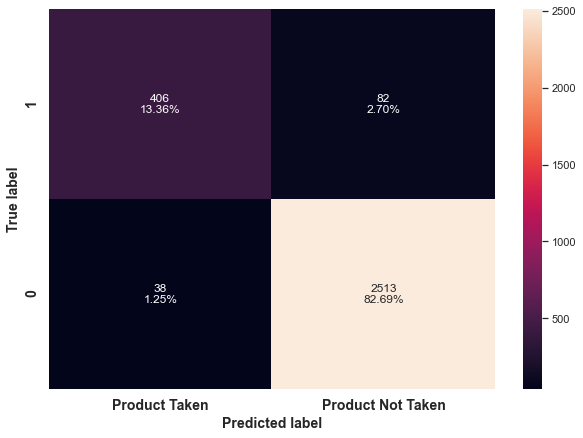

In [135]:
make_confusion_matrix(YY_test,preds)

In [136]:
classification_report(YY_test,preds)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98      2551\n           1       0.91      0.83      0.87       488\n\n    accuracy                           0.96      3039\n   macro avg       0.94      0.91      0.92      3039\nweighted avg       0.96      0.96      0.96      3039\n'

 - Like we noticed in the EDA the top 3 most important features are within the product variables, more specifically: "Total_Trans_Ct", "Total_Trans_Amt", "Total_Amt_Chng_Q4_Q1".

 - ## Feature Importance 

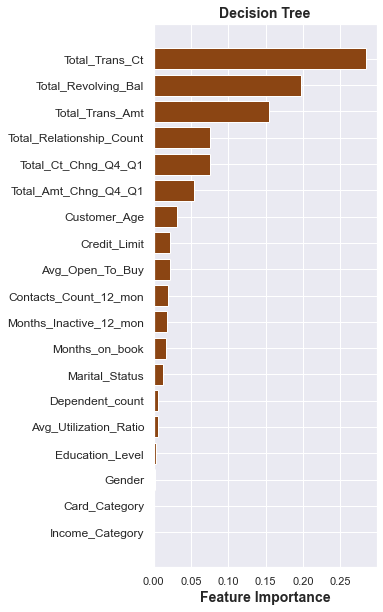

In [137]:
feature_names = X_train.columns
dtree = DecisionTreeClassifier()
#dtree.fit(X_train,y_train)
dtree.fit(XX_train,YY_train)
importances = dtree.feature_importances_
indices = np.argsort(importances);
fig=plt.figure(figsize=[4,10]);
plt.title('Decision Tree', fontsize=14, fontweight='bold');
plt.barh(range(len(indices)), importances[indices], align='center', color='saddlebrown');
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=12);
plt.xlabel('Feature Importance', fontsize=14, fontweight='bold');

# Section 10 
 - Business recommendation 
 - Future improvements


<a id="Conclusion"></a>
## Conclusion

We can conclude that the top 3 most influential features are the product variables: 
 - "Total_Trans_Ct", 
 - "Total_Trans_Amt", 
 - "Total_Amt_Chng_Q4_Q1". 
 - So, in short, those who keep thier account, use thier credit cards a lot.
 - Using the existing data we managed to train a model with upsampled data which reaches a recall score of 92%.
 - It's clear that the performance XGBoostClassifier is better. 
 - With a recall of 92.5 % we clearly reached our goal. ( goal: ... > 0.62 )
 - Business should focus on getting customers to use the credit they have more often. This seems to be the best predictor of keeping a customer.


### Recomentdation & Future improvements
* Use correlation matrix in EDA to find the most influential features.
* Use iterative imputer to get rid of the "Unknown" values?
* Use PCA for feature selection.
* Create a training and inferencing pipeline.
* Data Upsampling with ADASYN instead of SMOTE


With the existing consumer insights through data, companies can predict customers’ possible needs and issues, define proper strategies and solutions against them, meet their expectations and retain their business. Based on the predictive analysis and modeling, businesses can focus their attention with targeted approach by segmenting and offering them customized solutions. Analyzing how and when the churn is happening in customer’s lifecycle with the services will allow the company to come up with more preemptive measures.